In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sys

In [74]:
# set the params for plot
plt.rcParams['figure.figsize']=[5,5]
plt.rcParams['font.size']=14
plt.rcParams['axes.linewidth']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=7
plt.rcParams['ytick.major.size']=7
plt.rcParams['xtick.major.width']=1
plt.rcParams['ytick.major.width']=1
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.top']=True

In [2]:
fig_path = Path("C:\SNU\Internship\K-Spec\내시경\img")

# Connect / Disconnect 

In [95]:
cam = cv2.VideoCapture(1)
if not cam.isOpened():
    print("Could not open video device")
    sys.exit(0)
    
# Resolution
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 2544)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1944)
cam.set(cv2.CAP_PROP_AUTOFOCUS, 0)

True

In [94]:
# Release camera object
cam.release()

# Exposure Test

Setting Exposure = -12
Setting Exposure = -11
Setting Exposure = -10
Setting Exposure = -9
Setting Exposure = -8
Setting Exposure = -7
Setting Exposure = -6
Setting Exposure = -5
Setting Exposure = -4
Setting Exposure = -3
Setting Exposure = -2
Setting Exposure = -1
Setting Exposure = 0


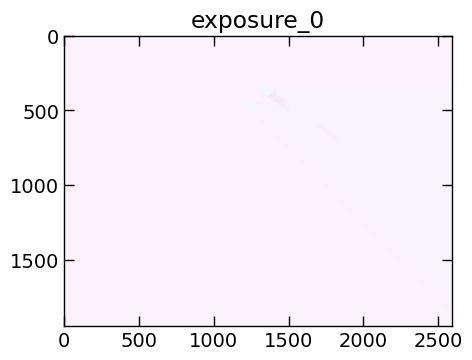

In [100]:
#Exposure setting
for exp in range(-12,1):
    print(f"Setting Exposure = {exp}")
    flag = cam.set(cv2.CAP_PROP_EXPOSURE, exp)
    ret, frame = cam.read()
    frame =  frame[:,:,::-1] # bgr -> rgb
    plt.imshow(frame)
    plt.title(f'exposure_{exp}')
    plt.savefig(fig_path / f'e_{exp}.png',dpi=300,bbox_inches='tight')

# Focus test

Setting focus = 150
Setting focus = 155
Setting focus = 160
Setting focus = 165
Setting focus = 170
Setting focus = 175
Setting focus = 180
Setting focus = 185
Setting focus = 190
Setting focus = 195
Setting focus = 200
Setting focus = 205
Setting focus = 210
Setting focus = 215
Setting focus = 220
Setting focus = 225
Setting focus = 230
Setting focus = 235
Setting focus = 240
Setting focus = 245
Setting focus = 250
Setting focus = 255


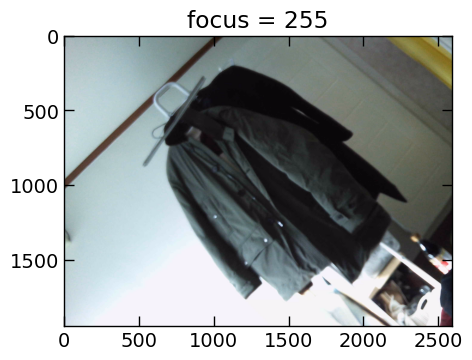

In [88]:
flist = []
# min: 0, max: 255, increment:5
fs = range(150,260,5)
cam.set(cv2.CAP_PROP_EXPOSURE, -7)
for focus in fs:
    print(f"Setting focus = {focus}")
    flag = cam.set(cv2.CAP_PROP_FOCUS, focus)
    ret, frame = cam.read()
    frame =  frame[:,:,::-1] # bgr -> rgb
    flist.append(frame)
    plt.imshow(frame)
    plt.title(f'focus = {focus}')
    plt.savefig(fig_path / f'f_{focus}.png',dpi=300,bbox_inches='tight')

# Check Focusing

In [89]:
var = np.zeros(len(flist))
# Convolve image with laplacian kernel
for i in range(len(flist)):
    var[i] = cv2.Laplacian(flist[i], cv2.CV_64F).var()

Text(0.5, 0, 'Focus')

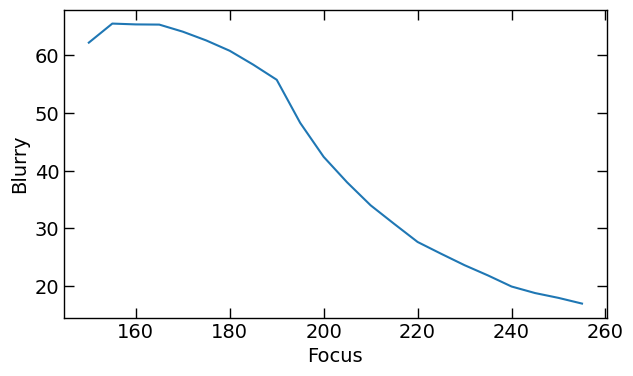

In [90]:
# Larger variation means better focus
plt.figure(figsize=(7,4))
plt.plot(fs,var)#,label='Far object(~3m)')
plt.ylabel('Blurry')
plt.xlabel('Focus')